In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
reddit=pd.read_csv('../data/reddit_sentiment_vader.csv')

In [114]:
reddit.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2334600 entries, 2021-02-16 to 2022-09-02
Data columns (total 6 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   texto                  object 
 1   texto_limpio           object 
 2   sentiment_category     object 
 3   sentiment_score        int64  
 4   vader_sentiment_score  float64
 5   year                   int32  
dtypes: float64(1), int32(1), int64(1), object(3)
memory usage: 115.8+ MB


In [11]:
print(reddit.head(15))

         date                                              texto  \
0  2021-02-16                          Whats going on with PLTR?   
1  2021-02-16  Need explanations on Level 2 data for GME, why...   
2  2021-02-16       XRT is being used as a laundry short machine   
3  2021-02-16                                          Airlines?   
4  2021-02-16                                         Buy TRXC 🚀   
5  2021-02-16                                              $AMTX   
6  2021-02-16  Lost 99% of its value....this stock can only g...   
7  2021-02-16           Bull run AMC ENTERTAINMENT Europe market   
8  2021-02-16                                    AMC 2 MILLION!!   
9  2021-02-16  Overview of clean Battery Graphite Miners for ...   
10 2021-02-16  Thank you very much, IAG goes up 9% in two day...   
11 2021-02-16                              TAAT is SMOOOOKING!!!   
12 2021-02-16  AMC plus 11 percent right now . Germany is hol...   
13 2021-02-16  Just put a order in the premarket

In [16]:
import yfinance as yf

# Descargar los datos del S&P 500 (ejemplo con un rango de fechas)
sp500_data = yf.download('^GSPC', start='2021-01-01', end='2023-01-01')

# Asegurarse de que 'date' esté en formato datetime (si es necesario)
sp500_data['date'] = sp500_data.index


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [18]:
print(sp500_data.columns)


MultiIndex([( 'Close', '^GSPC'),
            (  'High', '^GSPC'),
            (   'Low', '^GSPC'),
            (  'Open', '^GSPC'),
            ('Volume', '^GSPC'),
            (  'date',      '')],
           names=['Price', 'Ticker'])


In [25]:
import yfinance as yf

# Ensure you download the data again if you haven't in this session
sp500_data = yf.download('^GSPC', start='2021-01-01', end='2023-01-01')

print("Columns of sp500_data:")
print(sp500_data.columns)
print("\nIndex of sp500_data:")
print(sp500_data.index)
print("\nHead of sp500_data:")
print(sp500_data.head())

[*********************100%***********************]  1 of 1 completed

Columns of sp500_data:
MultiIndex([( 'Close', '^GSPC'),
            (  'High', '^GSPC'),
            (   'Low', '^GSPC'),
            (  'Open', '^GSPC'),
            ('Volume', '^GSPC')],
           names=['Price', 'Ticker'])

Index of sp500_data:
DatetimeIndex(['2021-01-04', '2021-01-05', '2021-01-06', '2021-01-07',
               '2021-01-08', '2021-01-11', '2021-01-12', '2021-01-13',
               '2021-01-14', '2021-01-15',
               ...
               '2022-12-16', '2022-12-19', '2022-12-20', '2022-12-21',
               '2022-12-22', '2022-12-23', '2022-12-27', '2022-12-28',
               '2022-12-29', '2022-12-30'],
              dtype='datetime64[ns]', name='Date', length=503, freq=None)

Head of sp500_data:
Price             Close         High          Low         Open      Volume
Ticker            ^GSPC        ^GSPC        ^GSPC        ^GSPC       ^GSPC
Date                                                                      
2021-01-04  3700.649902  3769.989990  366

In [23]:
print(reddit.columns)
print(reddit.head())

Index(['texto', 'texto_limpio', 'sentiment_category', 'sentiment_score',
       'vader_sentiment_score'],
      dtype='object')
                                                        texto  \
date                                                            
2021-02-16                          Whats going on with PLTR?   
2021-02-16  Need explanations on Level 2 data for GME, why...   
2021-02-16       XRT is being used as a laundry short machine   
2021-02-16                                          Airlines?   
2021-02-16                                         Buy TRXC 🚀   

                                                 texto_limpio  \
date                                                            
2021-02-16                                   whats going pltr   
2021-02-16  need explanation level data gme isnt price hig...   
2021-02-16                     xrt used laundry short machine   
2021-02-16                                            airline   
2021-02-16                

In [37]:
print(reddit.loc['2021'].groupby(reddit.loc['2021'].index.date).size().sort_values(ascending=False).head(20))

2021-01-28    172291
2021-01-29    119053
2021-02-01     78368
2021-02-02     76602
2021-01-30     56887
2021-01-27     52650
2021-01-31     47859
2021-02-03     39649
2021-02-04     33940
2021-02-11     16330
2021-01-25     15238
2021-01-26     13093
2021-02-10     11625
2021-02-05     11306
2021-02-12     10832
2021-02-09      9372
2021-02-08      8609
2021-02-25      7402
2021-01-22      7158
2021-03-10      6490
dtype: int64


In [46]:
print("Index of daily_sentiment:")
print(daily_sentiment.index)
print("\nHead of daily_sentiment:")
print(daily_sentiment.head())

Index of daily_sentiment:
MultiIndex([(2008-10-17, 'Bullish'),
            (2008-10-17, 'Bearish'),
            (2008-10-23, 'Bullish'),
            (2008-10-23, 'Bearish'),
            (2008-10-31, 'Bullish'),
            (2008-10-31, 'Bearish'),
            (2008-12-12, 'Bullish'),
            (2008-12-12, 'Bearish'),
            (2009-02-01, 'Bullish'),
            (2009-02-01, 'Bearish'),
            ...
            (2025-03-26, 'Bullish'),
            (2025-03-26, 'Bearish'),
            (2025-03-27, 'Bullish'),
            (2025-03-27, 'Bearish'),
            (2025-03-28, 'Bullish'),
            (2025-03-28, 'Bearish'),
            (2025-03-29, 'Bullish'),
            (2025-03-29, 'Bearish'),
            (2025-03-30, 'Bullish'),
            (2025-03-30, 'Bearish')],
           length=9488)

Head of daily_sentiment:
2008-10-17  Bullish    0
            Bearish    0
2008-10-23  Bullish    0
            Bearish    0
2008-10-31  Bullish    0
Name: sentiment_category, dtype: int64


C:\Users\jamal\AppData\Local\Temp\ipykernel_16500\1281681673.py:43: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  centre_circle = plt.Circle((0,0), 0.70, color='white', fc='white', edgecolor='black')


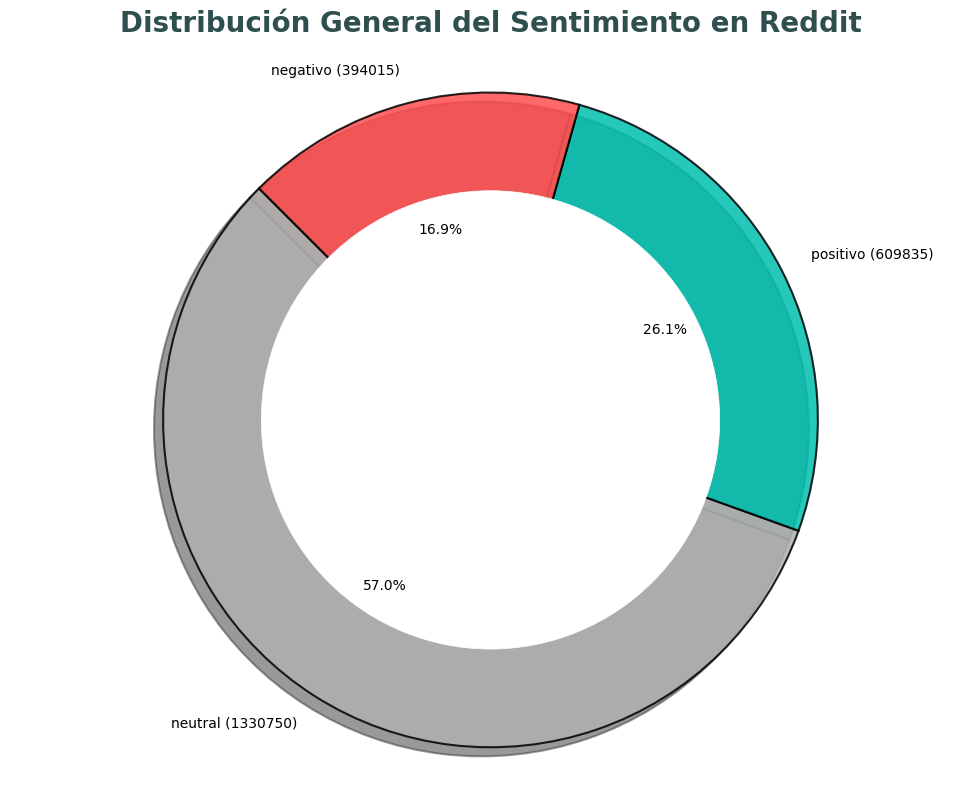

In [123]:
import pandas as pd
import matplotlib.pyplot as plt

# Asumiendo que el DataFrame es 'reddit' y ya contiene la columna 'sentiment_category'

# Contar las categorías de sentimiento
sentiment_counts = reddit['sentiment_category'].value_counts()

# Etiquetas y tamaños para el gráfico de pastel
labels = sentiment_counts.index
sizes = sentiment_counts.values

# Colores personalizados vibrantes y elegantes
colors = {
    'positivo': '#00bfae',  # Verde menta vibrante
    'negativo': '#ff4d4d',  # Rojo brillante
    'neutral': '#b0b0b0'    # Gris suave
}

colored_labels = [f"{label} ({sizes[i]})" for i, label in enumerate(labels)]
pie_colors = [colors.get(label, 'lightgrey') for label in labels]  # Usar get para etiquetas no conocidas

# Crear gráfico de pastel con estilo profesional
plt.figure(figsize=(10, 8))

# Pie chart con sombra, bordes suaves y rotación
plt.pie(sizes, 
        labels=colored_labels, 
        colors=pie_colors, 
        autopct='%1.1f%%', 
        startangle=135,  # Ángulo de inicio para mejor distribución
        wedgeprops={'edgecolor': 'black', 'linewidth': 1.5, 'linestyle': 'solid', 'alpha': 0.85}, 
        shadow=True)

# Título del gráfico con fuente personalizada
plt.title('Distribución General del Sentimiento en Reddit', 
          fontsize=20, 
          fontweight='bold', 
          color='darkslategray', 
          pad=20)

# Añadir un círculo en el centro para darle forma de dona
centre_circle = plt.Circle((0,0), 0.70, color='white', fc='white', edgecolor='black')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Asegurarse de que la proporción sea igual (gráfico circular)
plt.axis('equal')

# Agregar un estilo visual
plt.tight_layout()

# Mostrar gráfico
plt.show()


[*********************100%***********************]  1 of 1 completed


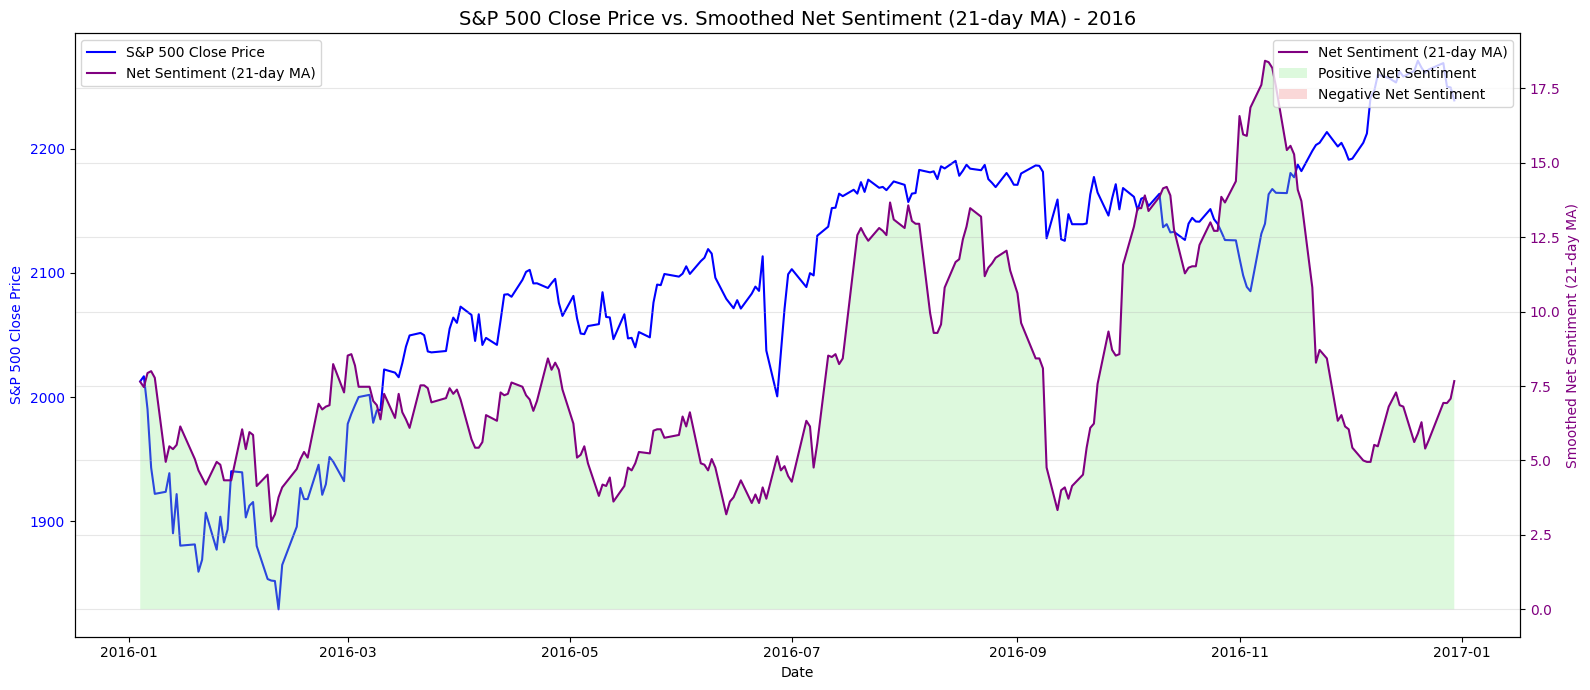

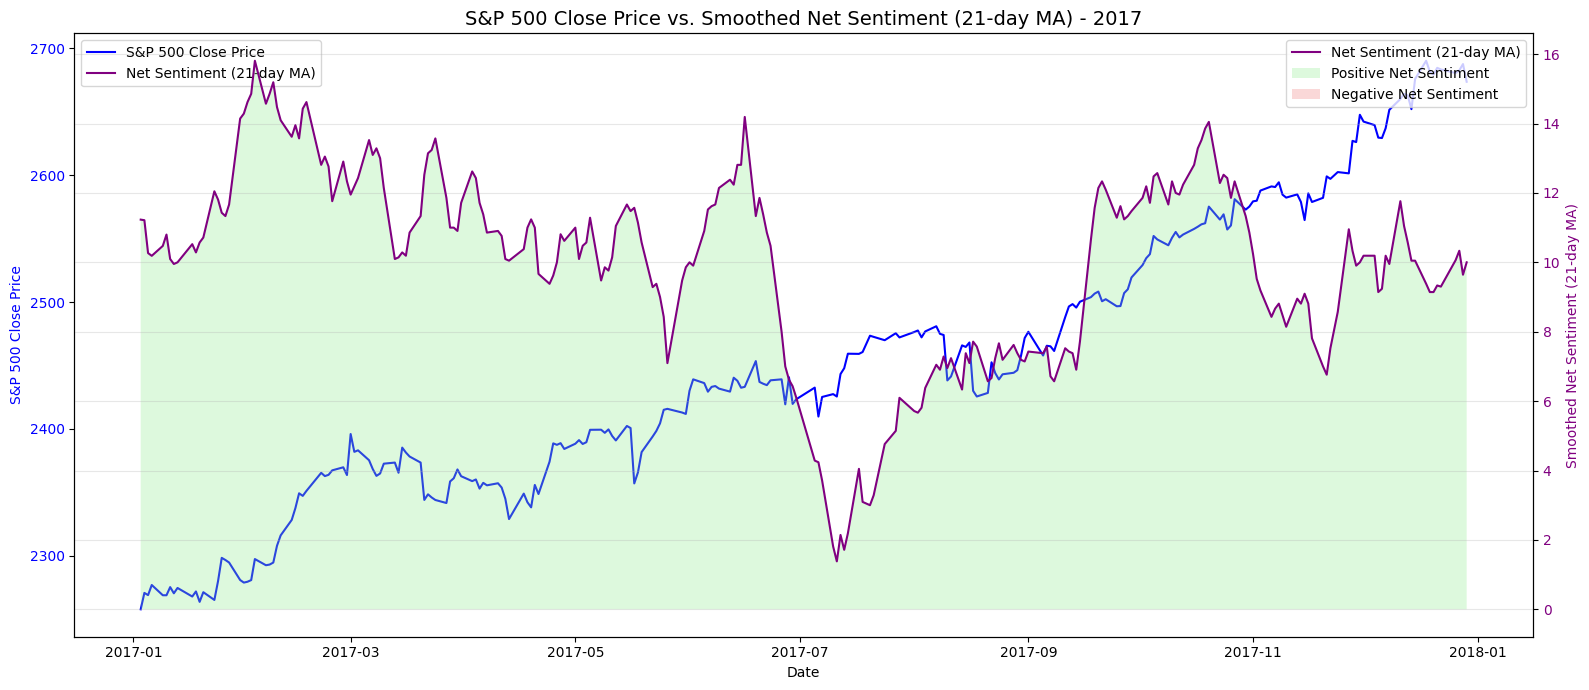

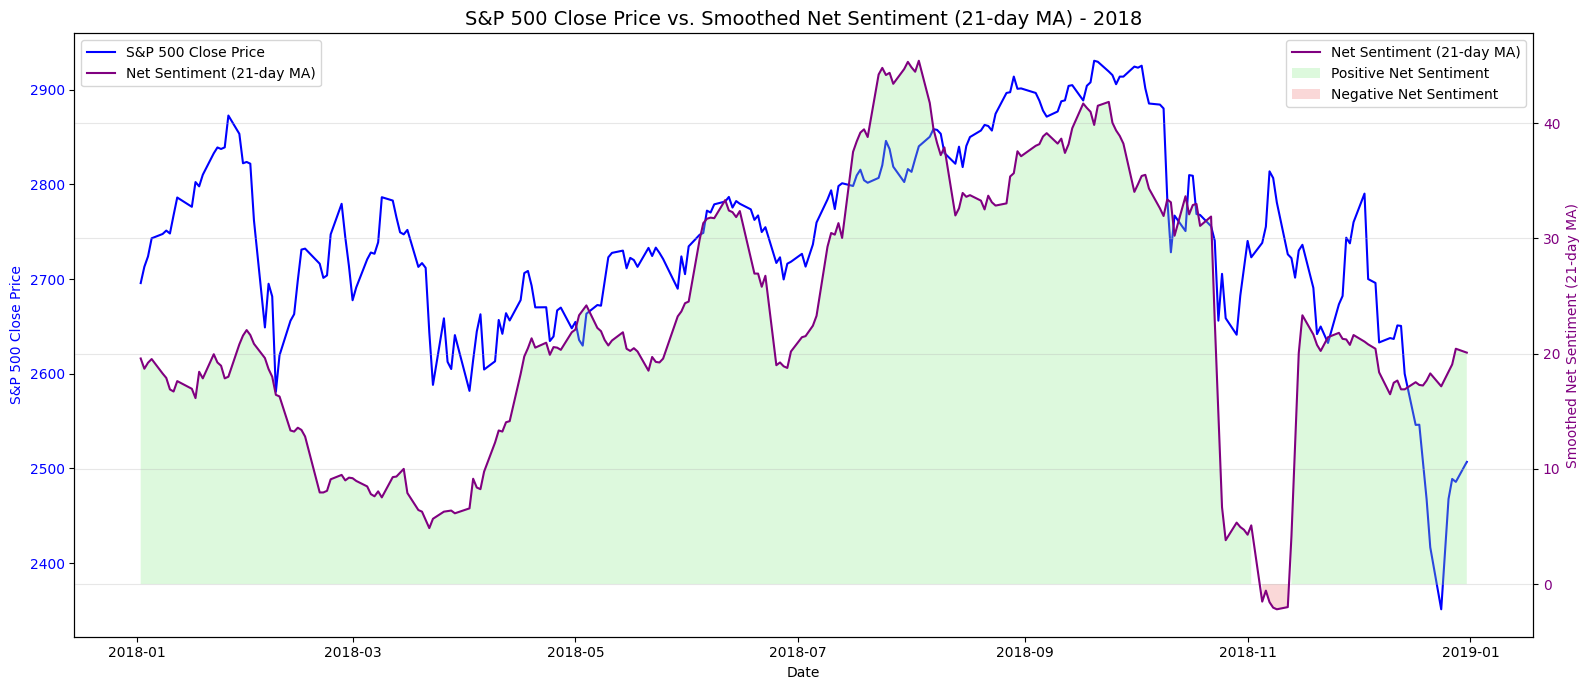

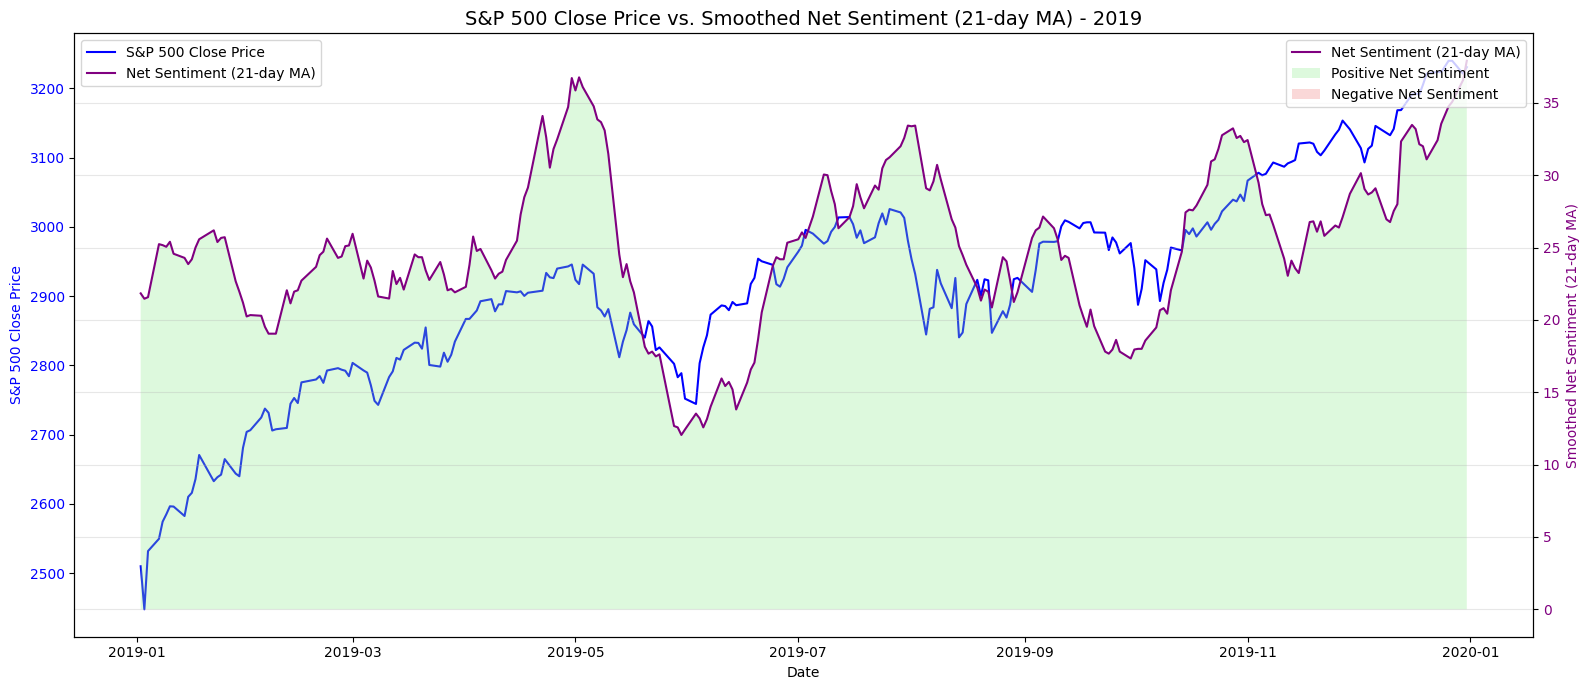

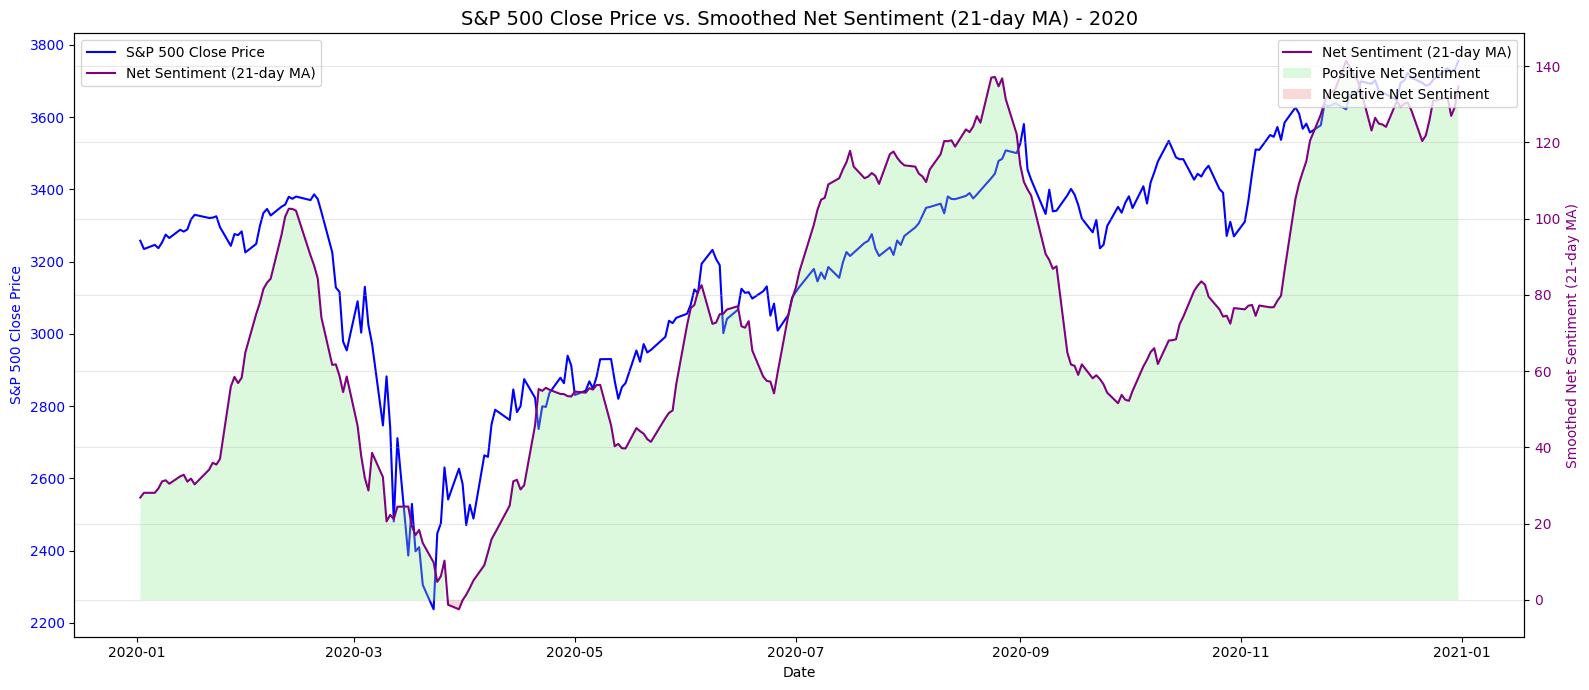

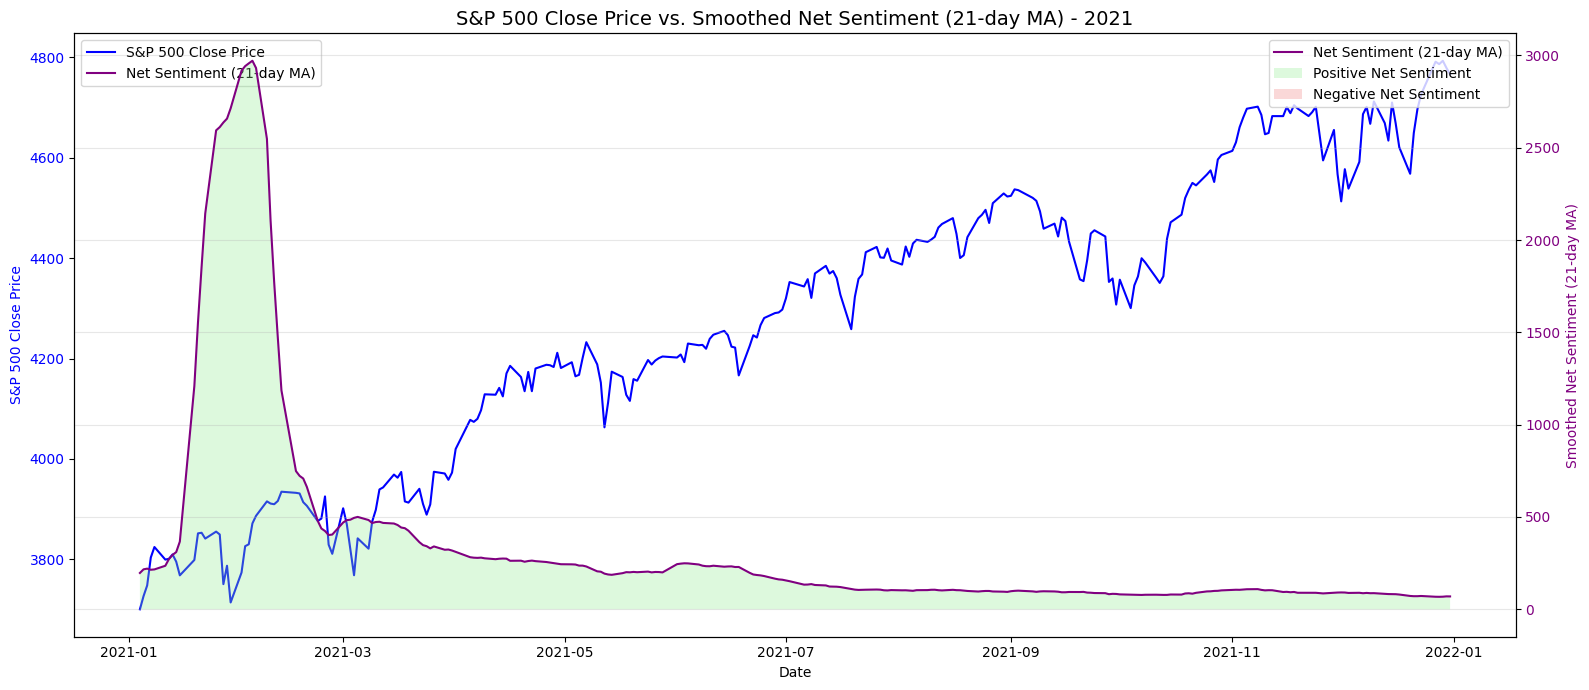

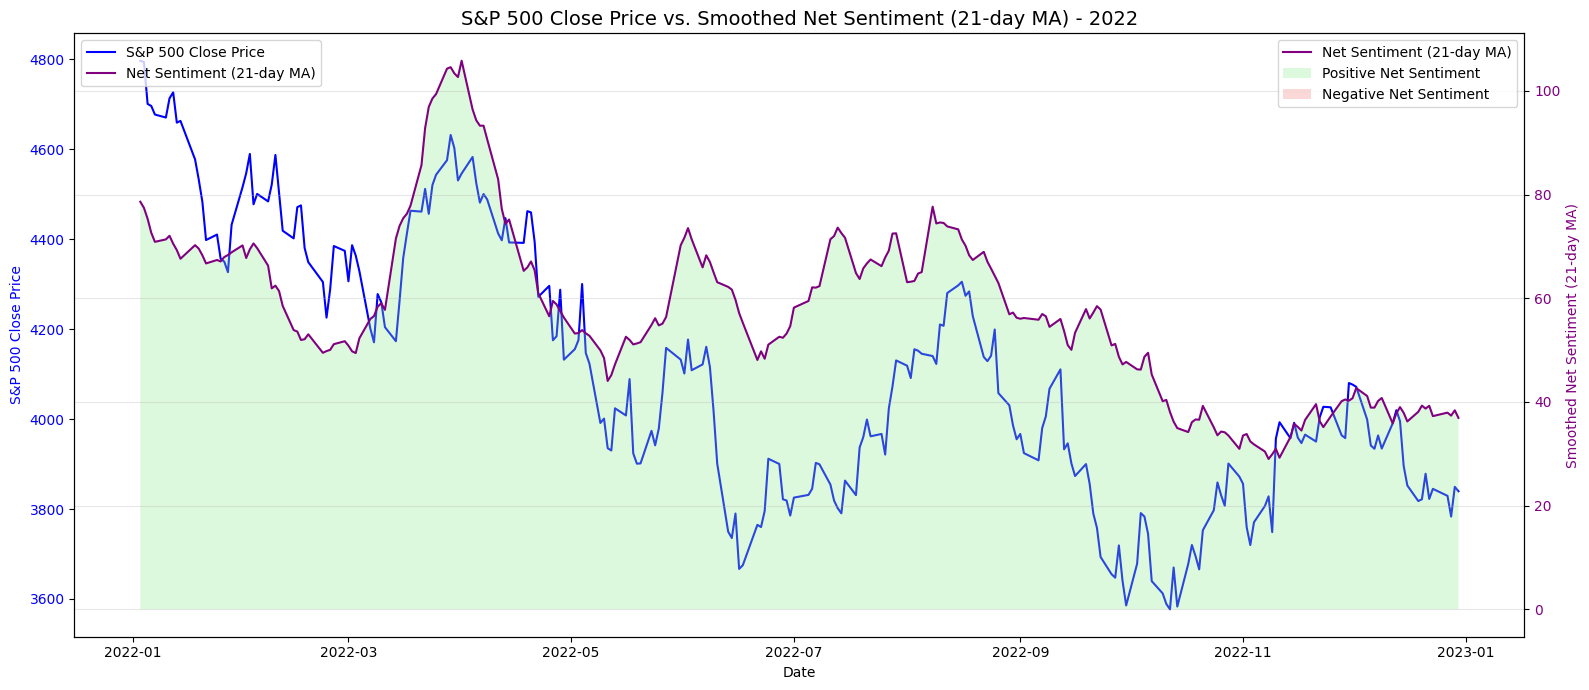

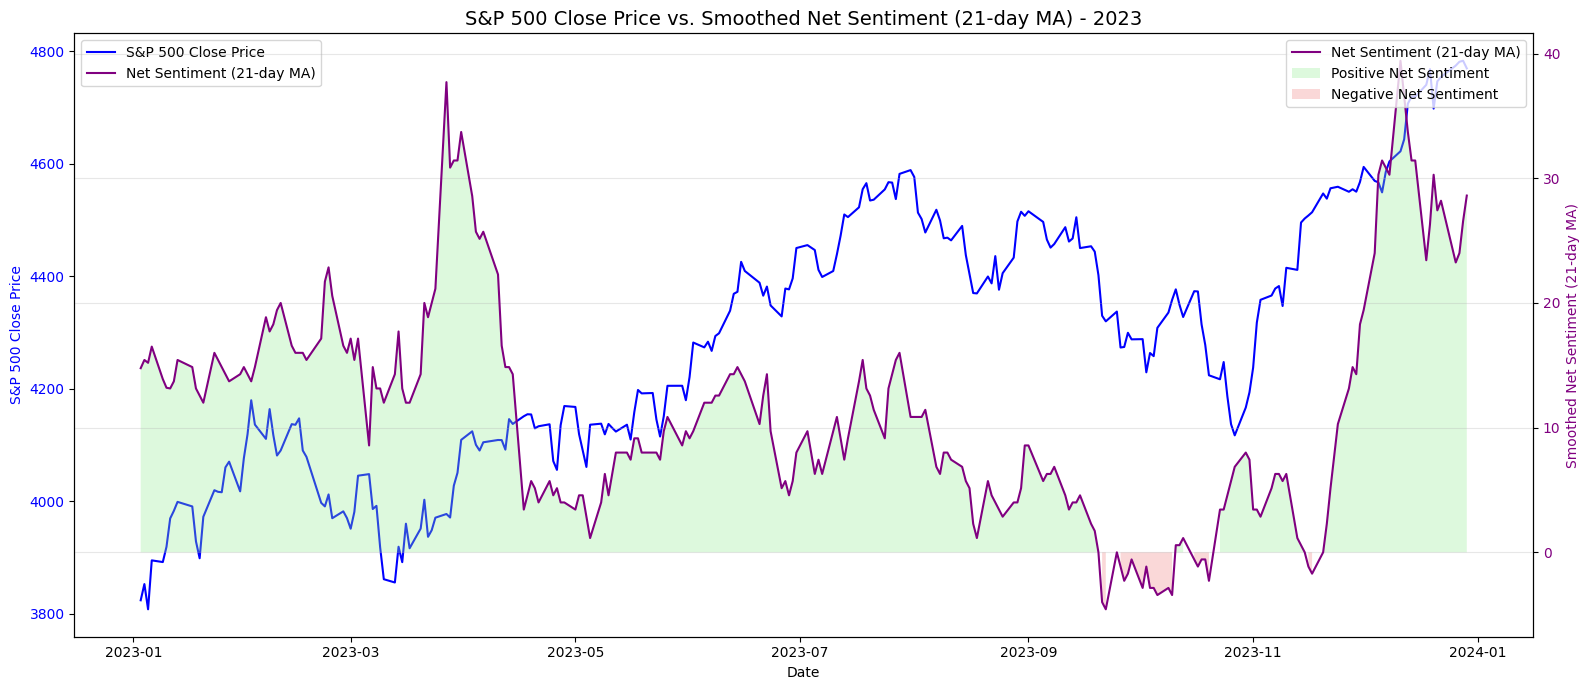

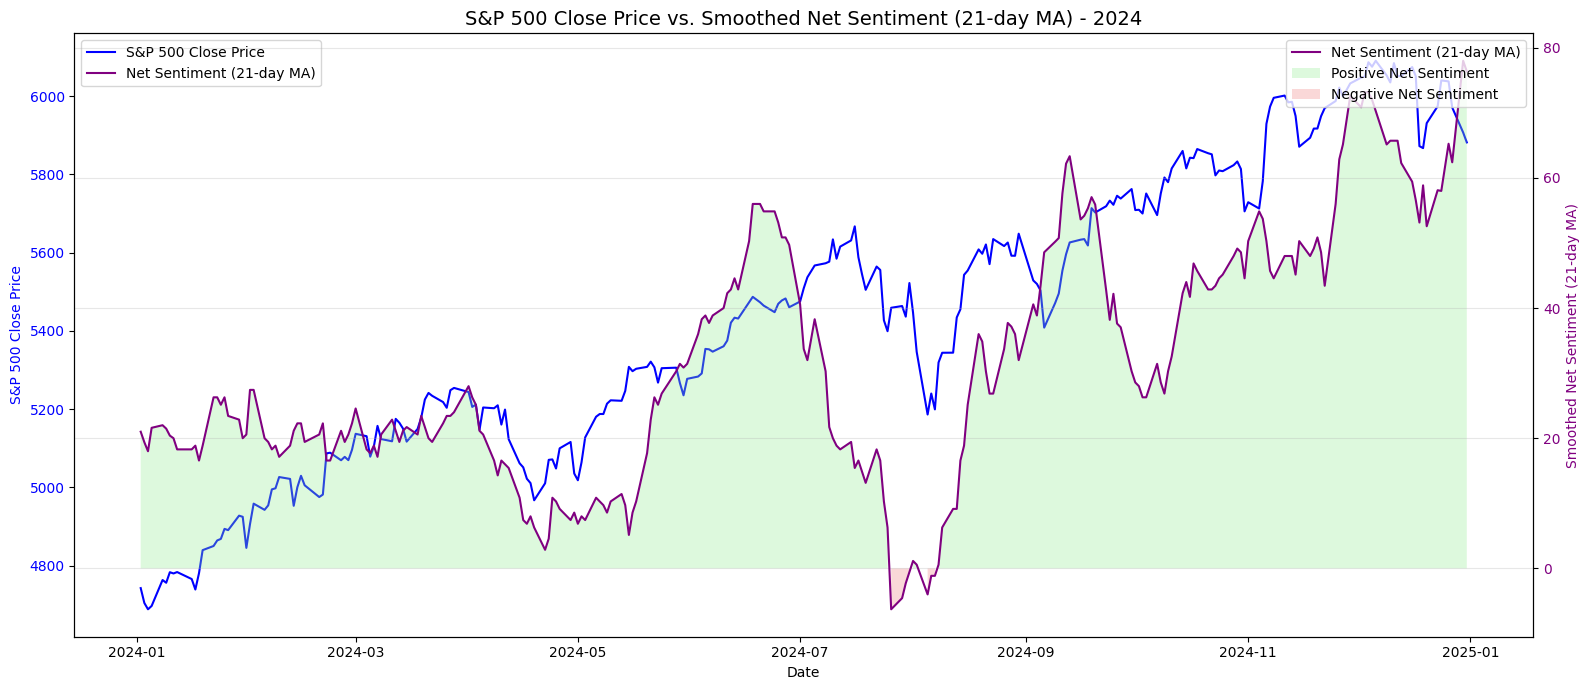

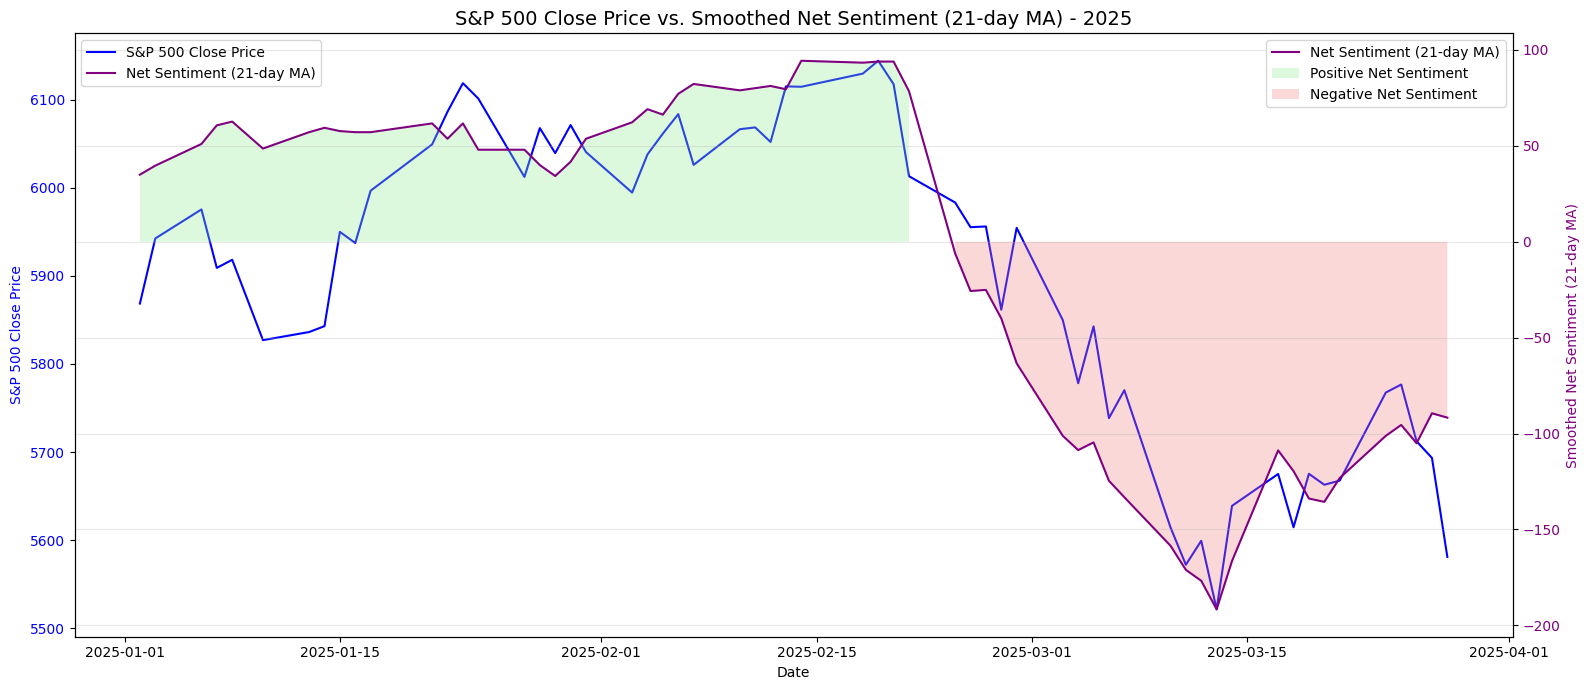

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import seaborn as sns
from datetime import datetime

# Descargar datos del S&P 500 para el periodo completo
sp500_data = yf.download('^GSPC', start='2016-01-01', end='2025-12-31')
sp500_data = sp500_data.reset_index()
if isinstance(sp500_data.columns, pd.MultiIndex):
    sp500_data.columns = [col[0] for col in sp500_data.columns]
sp500_data['Date'] = pd.to_datetime(sp500_data['Date']).dt.date
sp500_data = sp500_data[['Date', 'Close']].set_index('Date')

start_year = 2016
end_year = 2025
rolling_window_sentiment = 21

for year in range(start_year, end_year + 1):
    start_year_str = f'{year}-01-01'
    end_year_str = f'{year}-12-31'

    # Filtrar el DataFrame de reddit por el año actual
    yearly_reddit = reddit[(reddit.index >= start_year_str) & (reddit.index <= end_year_str)].copy()

    if not yearly_reddit.empty:
        # Calcular el conteo diario de sentimientos
        daily_sentiment_counts = yearly_reddit.groupby(yearly_reddit.index.date)['sentiment_category'].value_counts().unstack(fill_value=0)

        if 'positivo' in daily_sentiment_counts.columns and 'negativo' in daily_sentiment_counts.columns:
            # Calcular el net sentiment (positivo - negativo)
            daily_sentiment_counts['net_sentiment'] = daily_sentiment_counts['positivo'] - daily_sentiment_counts['negativo']
        elif 'positivo' in daily_sentiment_counts.columns:
            daily_sentiment_counts['net_sentiment'] = daily_sentiment_counts['positivo']
        elif 'negativo' in daily_sentiment_counts.columns:
            daily_sentiment_counts['net_sentiment'] = -daily_sentiment_counts['negativo']
        else:
            daily_sentiment_counts['net_sentiment'] = 0

        daily_sentiment = daily_sentiment_counts[['net_sentiment']].copy()
        daily_sentiment.index.name = 'date'

        # Calcular la media móvil del net sentiment
        daily_sentiment['sentiment_smoothed'] = daily_sentiment['net_sentiment'].rolling(window=rolling_window_sentiment, center=True, min_periods=1).mean()

        # Filtrar los datos del S&P 500 por el año actual
        yearly_sp500 = sp500_data[(sp500_data.index >= pd.to_datetime(start_year_str).date()) & (sp500_data.index <= pd.to_datetime(end_year_str).date())].copy()

        # Unir los datos de sentimiento y S&P 500
        combined_yearly = pd.merge(yearly_sp500, daily_sentiment[['sentiment_smoothed']], left_index=True, right_index=True, how='inner')

        if not combined_yearly.empty:
            # Graficar el precio del S&P 500 y el sentimiento suavizado
            plt.figure(figsize=(16, 7))
            plt.title(f'S&P 500 Close Price vs. Smoothed Net Sentiment ({rolling_window_sentiment}-day MA) - {year}', fontsize=14)

            ax1 = plt.gca()
            ax1.set_xlabel('Date')
            ax1.set_ylabel('S&P 500 Close Price', color='blue')
            line1 = ax1.plot(combined_yearly.index, combined_yearly['Close'], color='blue', label='S&P 500 Close Price')
            ax1.tick_params(axis='y', labelcolor='blue')

            ax2 = ax1.twinx()
            ax2.set_ylabel(f'Smoothed Net Sentiment ({rolling_window_sentiment}-day MA)', color='purple')
            line2 = ax2.plot(combined_yearly.index, combined_yearly['sentiment_smoothed'], color='purple', label=f'Net Sentiment ({rolling_window_sentiment}-day MA)')
            ax2.tick_params(axis='y', labelcolor='purple')

            # Rellenar entre la línea de sentimiento y y=0
            ax2.fill_between(combined_yearly.index, combined_yearly['sentiment_smoothed'], 0,
                             where=combined_yearly['sentiment_smoothed'] >= 0,
                             facecolor='lightgreen', alpha=0.3, label='Positive Net Sentiment')
            ax2.fill_between(combined_yearly.index, combined_yearly['sentiment_smoothed'], 0,
                             where=combined_yearly['sentiment_smoothed'] < 0,
                             facecolor='lightcoral', alpha=0.3, label='Negative Net Sentiment')

            # Añadir leyendas
            lines = line1 + line2
            labs = [l.get_label() for l in lines]
            ax1.legend(lines, labs, loc='upper left')
            ax2.legend(loc='upper right')

            plt.grid(True, alpha=0.3)
            plt.tight_layout()
            plt.show()
        else:
            print(f"No se pudieron combinar datos de sentimiento y S&P 500 para {year}")
    else:
        print(f"No hay datos de reddit para el año {year}")

In [103]:
reddit.head

<bound method NDFrame.head of                                                         texto  \
date                                                            
2021-02-16                          Whats going on with PLTR?   
2021-02-16  Need explanations on Level 2 data for GME, why...   
2021-02-16       XRT is being used as a laundry short machine   
2021-02-16                                          Airlines?   
2021-02-16                                         Buy TRXC 🚀   
...                                                       ...   
2022-09-13  One can only assess what the likelihood is of ...   
2022-09-03  Hi, as you all know most alt coins follow Bitc...   
2022-09-03  1. Singapore is reportedly planning new legisl...   
2022-09-03  Yesterday after the stock markets were in soli...   
2022-09-02  Just some information I want to share.\n\nRece...   

                                                 texto_limpio  \
date                                                       

In [110]:
print(sp500.columns.tolist())


['Date', 'Close_^GSPC', 'High_^GSPC', 'Low_^GSPC', 'Open_^GSPC', 'Volume_^GSPC']
